In [92]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.model_selection import (train_test_split, GridSearchCV, cross_val_score)
from sklearn.linear_model import LinearRegression, LogisticRegressionCV, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, accuracy_score
from sklearn.decomposition import PCA
from sklearn.ensemble import AdaBoostClassifier, BaggingClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
import time
import xgboost as xgb
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline, make_pipeline



# LOADING STUFF

In [2]:
train = pd.read_csv('data/train_set.csv')
test = pd.read_csv('data/test_set.csv')

In [3]:
train['date'] = pd.to_datetime(train['date'])
test['date'] = pd.to_datetime(test['date'])
test.drop(columns='id', inplace=True)

In [4]:
# preview
train

,date,latitude,longitude,addressaccuracy,nummosquitos,wnvpresent,species_nr,trap_rank,tmax,tmin,...,stnpressure,sealevel,resultspeed,resultdir,avgspeed,temp_diff,week,year,FG,TS
0,2007-05-29,41.731922,-87.677512,8,1,0,3.0,0,88.0,62.5,...,29.415,30.10,5.80,17.0,6.95,10.25,22.0,2007.0,0.0,0.0
1,2007-05-29,41.688324,-87.676709,8,1,0,2.0,0,88.0,62.5,...,29.415,30.10,5.80,17.0,6.95,10.25,22.0,2007.0,0.0,0.0
2,2007-05-29,41.867108,-87.654224,8,1,0,2.0,0,88.0,62.5,...,29.415,30.10,5.80,17.0,6.95,10.25,22.0,2007.0,0.0,0.0
3,2007-05-29,41.891126,-87.611560,5,1,0,2.0,0,88.0,62.5,...,29.415,30.10,5.80,17.0,6.95,10.25,22.0,2007.0,0.0,0.0
4,2007-05-29,41.919343,-87.694259,8,1,0,2.0,0,88.0,62.5,...,29.415,30.10,5.80,17.0,6.95,10.25,22.0,2007.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8164,2013-09-26,41.750498,-87.605294,5,1,0,1.0,0,75.0,52.5,...,29.370,30.04,3.95,8.5,4.40,-1.25,39.0,2013.0,0.0,0.0
8165,2013-09-26,41.803423,-87.642984,8,2,0,1.0,0,75.0,52.5,...,29.370,30.04,3.95,8.5,4.40,-1.25,39.0,2013.0,0.0,0.0
8166,2013-09-26,41.867108,-87.654224,8,7,0,1.0,0,75.0,52.5,...,29.370,30.04,3.95,8.5,4.40,-1.25,39.0,2013.0,0.0,0.0
8167,2013-09-26,41.963976,-87.691810,9,8,0,1.0,0,75.0,52.5,...,29.370,30.04,3.95,8.5,4.40,-1.25,39.0,2013.0,0.0,0.0


In [5]:
test

,date,latitude,longitude,addressaccuracy,species_nr,trap_rank,tmax,tmin,tavg,depart,...,stnpressure,sealevel,resultspeed,resultdir,avgspeed,temp_diff,week,year,FG,TS
0,2008-06-11,41.954690,-87.800991,9,2.0,0,86.0,63.5,74.75,7.0,...,29.310,29.98,9.15,18.0,10.2,9.75,24.0,2008.0,0.0,0.0
1,2008-06-11,41.954690,-87.800991,9,1.0,0,86.0,63.5,74.75,7.0,...,29.310,29.98,9.15,18.0,10.2,9.75,24.0,2008.0,0.0,0.0
2,2008-06-11,41.954690,-87.800991,9,3.0,0,86.0,63.5,74.75,7.0,...,29.310,29.98,9.15,18.0,10.2,9.75,24.0,2008.0,0.0,0.0
3,2008-06-11,41.954690,-87.800991,9,0.0,0,86.0,63.5,74.75,7.0,...,29.310,29.98,9.15,18.0,10.2,9.75,24.0,2008.0,0.0,0.0
4,2008-06-11,41.954690,-87.800991,9,0.0,0,86.0,63.5,74.75,7.0,...,29.310,29.98,9.15,18.0,10.2,9.75,24.0,2008.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116288,2014-10-02,41.925652,-87.633590,8,0.0,0,73.5,64.5,69.00,10.0,...,29.065,29.78,7.20,17.0,7.9,4.00,40.0,2014.0,0.0,1.0
116289,2014-10-02,41.925652,-87.633590,8,0.0,0,73.5,64.5,69.00,10.0,...,29.065,29.78,7.20,17.0,7.9,4.00,40.0,2014.0,0.0,1.0
116290,2014-10-02,41.925652,-87.633590,8,0.0,0,73.5,64.5,69.00,10.0,...,29.065,29.78,7.20,17.0,7.9,4.00,40.0,2014.0,0.0,1.0
116291,2014-10-02,41.925652,-87.633590,8,0.0,0,73.5,64.5,69.00,10.0,...,29.065,29.78,7.20,17.0,7.9,4.00,40.0,2014.0,0.0,1.0


In [6]:
train.columns

Index(['date', 'latitude', 'longitude', 'addressaccuracy', 'nummosquitos',
       'wnvpresent', 'species_nr', 'trap_rank', 'tmax', 'tmin', 'tavg',
       'depart', 'dewpoint', 'wetbulb', 'sunrise', 'sunset', 'preciptotal',
       'stnpressure', 'sealevel', 'resultspeed', 'resultdir', 'avgspeed',
       'temp_diff', 'week', 'year', 'FG', 'TS'],
      dtype='object')

In [7]:
test.columns

Index(['date', 'latitude', 'longitude', 'addressaccuracy', 'species_nr',
       'trap_rank', 'tmax', 'tmin', 'tavg', 'depart', 'dewpoint', 'wetbulb',
       'sunrise', 'sunset', 'preciptotal', 'stnpressure', 'sealevel',
       'resultspeed', 'resultdir', 'avgspeed', 'temp_diff', 'week', 'year',
       'FG', 'TS'],
      dtype='object')

In [8]:
train.columns.shape

(27,)

In [9]:
test.columns.shape

(25,)

In [10]:
train['wnv_1'] = train['wnvpresent'].map(lambda x: 0 if x == 0 else 1)

# SET & SPLIT X and y

In [11]:
X = train.drop(columns=['date', 'wnvpresent', 'wnv_1'])
y = train['wnv_1']

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    stratify=y,
                                                    random_state=42
                                                   )

# Standard Scaler, Logit --> Overfit

In [13]:
logit = LogisticRegressionCV()
ss = StandardScaler()

pipe_ss_logit = Pipeline([
    ('ss', ss),
    ('logit', logit)
])

pipe_ss_logit_params = {
#     'ss__with_mean': [True, False],
#     'ss__with_std': [True, False],
    'logit__cv': [5],                                    # 10, 15
    'logit__n_jobs': [-1],
    'logit__random_state': [42],
    'logit__max_iter': [10_000],
#     'logit__l1_ratios': [i for i in np.linspace(0, 1, 5)]
}

gs_ss_logit = GridSearchCV(
    estimator=pipe_ss_logit,
    param_grid=pipe_ss_logit_params,
    cv=5
)

gs_ss_logit.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('ss', StandardScaler()),
                                       ('logit', LogisticRegressionCV())]),
             param_grid={'logit__cv': [5, 10, 15], 'logit__max_iter': [10000],
                         'logit__n_jobs': [-1], 'logit__random_state': [42],
                         'ss__with_mean': [True, False],
                         'ss__with_std': [True, False]})

In [14]:
pipe_ss_logit.get_params()

{'memory': None,
 'steps': [('ss', StandardScaler()), ('logit', LogisticRegressionCV())],
 'verbose': False,
 'ss': StandardScaler(),
 'logit': LogisticRegressionCV(),
 'ss__copy': True,
 'ss__with_mean': True,
 'ss__with_std': True,
 'logit__Cs': 10,
 'logit__class_weight': None,
 'logit__cv': None,
 'logit__dual': False,
 'logit__fit_intercept': True,
 'logit__intercept_scaling': 1.0,
 'logit__l1_ratios': None,
 'logit__max_iter': 100,
 'logit__multi_class': 'auto',
 'logit__n_jobs': None,
 'logit__penalty': 'l2',
 'logit__random_state': None,
 'logit__refit': True,
 'logit__scoring': None,
 'logit__solver': 'lbfgs',
 'logit__tol': 0.0001,
 'logit__verbose': 0}

In [15]:
gs_ss_logit.best_params_

{'logit__cv': 5,
 'logit__max_iter': 10000,
 'logit__n_jobs': -1,
 'logit__random_state': 42,
 'ss__with_mean': True,
 'ss__with_std': True}

In [16]:
gs_ss_logit.predict_proba(X_test)

array([[0.99156313, 0.00843687],
       [0.9860738 , 0.0139262 ],
       [0.98763412, 0.01236588],
       ...,
       [0.98529588, 0.01470412],
       [0.9932748 , 0.0067252 ],
       [0.98959913, 0.01040087]])

In [18]:
y_preds = gs_ss_logit.predict(X_test)

In [19]:
gs_ss_logit.score(X_test, y_test)

1.0

In [20]:
tn, fp, fn, tp = confusion_matrix(y_test, y_preds).ravel()
print(f'Accuracy (Test Score): {round((tp+tn)/(tn+fp+fn+tp),3)*100}%')


Accuracy (Test Score): 100.0%


In [21]:
gs_ss_logit.best_score_


0.9996939556235654

In [22]:
gs_ss_logit.score(X_train, y_train)

0.9996939556235654

In [23]:
gs_ss_logit.score(X_test, y_test)

1.0

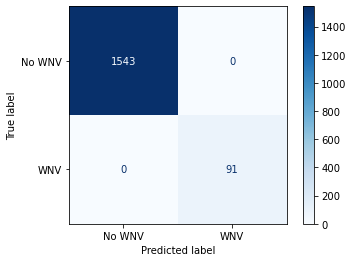

In [24]:
plot_confusion_matrix(gs_ss_logit, 
                          X_test, y_test, 
                          cmap='Blues', 
                          values_format='d',
                          display_labels=['No WNV', 'WNV']
                         );

# SS, LR

In [25]:
ss = StandardScaler()
lr = LinearRegression()

pipe_ss_lr = Pipeline([
    ('ss', ss),
    ('lr', lr),
    
])

pipe_ss_lr_params = {
    'ss__with_mean': [True, False],
    'ss__with_std': [True, False],
    'lr__n_jobs': [-1],
}

gs_ss_lr = GridSearchCV(
    estimator=pipe_ss_lr,
    param_grid=pipe_ss_lr_params,
    cv=5
)

gs_ss_lr.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('ss', StandardScaler()),
                                       ('lr', LinearRegression())]),
             param_grid={'lr__n_jobs': [-1], 'ss__with_mean': [True, False],
                         'ss__with_std': [True, False]})

In [26]:
cross_val_score(gs_ss_lr,
                X_train,
                y_train,
                cv=10,
               ).mean()

0.8509761607158228

In [27]:
gs_ss_lr.best_score_

0.8573937731691139

In [28]:
gs_ss_lr.score(X_train, y_train)

0.8624097145843705

In [29]:
gs_ss_lr.score(X_test, y_test)

0.8389105056032097

In [30]:
pipe_ss_lr.get_params()

{'memory': None,
 'steps': [('ss', StandardScaler()), ('lr', LinearRegression())],
 'verbose': False,
 'ss': StandardScaler(),
 'lr': LinearRegression(),
 'ss__copy': True,
 'ss__with_mean': True,
 'ss__with_std': True,
 'lr__copy_X': True,
 'lr__fit_intercept': True,
 'lr__n_jobs': None,
 'lr__normalize': False,
 'lr__positive': False}

# SS, PCA, Logit 1

In [31]:
ss = StandardScaler()
pca = PCA()
logit = LogisticRegressionCV()

pipe_ss_pca_logit = Pipeline([
    ('ss', ss),
    ('pca', pca),
    ('logit', logit)
])

pipe_ss_pca_logit_params = {
#     'ss__with_mean': [True, False],
#     'ss__with_std': [True, False],
    'pca__n_components': [3, 5],                   
    'pca__random_state': [42],
    'logit__cv': [5],                              # 10
    'logit__random_state': [42],
    'logit__max_iter': [5_000],
    'logit__n_jobs': [-1],
    'logit__solver': ['saga'],                     # lbfgs
    'logit__scoring': ['roc_auc']
}

gs_ss_pca_logit = GridSearchCV(
    estimator=pipe_ss_pca_logit,
    param_grid=pipe_ss_pca_logit_params,
    cv=5
)

gs_ss_pca_logit.fit(X_train, y_train)

/Users/edwardnathanael/opt/anaconda3/envs/dsi24/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/edwardnathanael/opt/anaconda3/envs/dsi24/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('ss', StandardScaler()), ('pca', PCA()),
                                       ('logit', LogisticRegressionCV())]),
             param_grid={'logit__cv': [5, 10], 'logit__max_iter': [5000],
                         'logit__n_jobs': [-1], 'logit__random_state': [42],
                         'logit__scoring': ['roc_auc'],
                         'logit__solver': ['lbfgs', 'saga'],
                         'pca__n_components': [3, 5], 'pca__random_state': [42],
                         'ss__with_mean': [True, False],
                         'ss__with_std': [True, False]})

In [32]:
pipe_ss_pca_logit.get_params()

{'memory': None,
 'steps': [('ss', StandardScaler()),
  ('pca', PCA()),
  ('logit', LogisticRegressionCV())],
 'verbose': False,
 'ss': StandardScaler(),
 'pca': PCA(),
 'logit': LogisticRegressionCV(),
 'ss__copy': True,
 'ss__with_mean': True,
 'ss__with_std': True,
 'pca__copy': True,
 'pca__iterated_power': 'auto',
 'pca__n_components': None,
 'pca__random_state': None,
 'pca__svd_solver': 'auto',
 'pca__tol': 0.0,
 'pca__whiten': False,
 'logit__Cs': 10,
 'logit__class_weight': None,
 'logit__cv': None,
 'logit__dual': False,
 'logit__fit_intercept': True,
 'logit__intercept_scaling': 1.0,
 'logit__l1_ratios': None,
 'logit__max_iter': 100,
 'logit__multi_class': 'auto',
 'logit__n_jobs': None,
 'logit__penalty': 'l2',
 'logit__random_state': None,
 'logit__refit': True,
 'logit__scoring': None,
 'logit__solver': 'lbfgs',
 'logit__tol': 0.0001,
 'logit__verbose': 0}

In [33]:
gs_ss_pca_logit.best_estimator_

Pipeline(steps=[('ss', StandardScaler()),
                ('pca', PCA(n_components=5, random_state=42)),
                ('logit',
                 LogisticRegressionCV(cv=5, max_iter=5000, n_jobs=-1,
                                      random_state=42, scoring='roc_auc',
                                      solver='saga'))])

In [34]:
gs_ss_pca_logit.score(X_train, y_train)

0.8487461988241933

In [35]:
gs_ss_pca_logit.score(X_test, y_test)

0.8204368541374374

# SS, PCA, Logit 2

In [36]:
ss = StandardScaler()
pca = PCA()
logit = LogisticRegressionCV()

pipe_ss_pca_logit_2 = Pipeline([
    ('ss', ss),
    ('pca', pca),
    ('logit', logit)
])

pipe_ss_pca_logit_params_2 = {
#     'ss__with_mean': [True, False],
#     'ss__with_std': [True, False],
    'pca__n_components': [10],                  # 5
    'pca__random_state': [42],
    'logit__cv': [10],                          # 15
    'logit__random_state': [42],
    'logit__max_iter': [10_000],
    'logit__n_jobs': [-1],
    'logit__solver': ['saga'],                  # lbfgs
#     'logit__scoring': ['roc_auc']
}

gs_ss_pca_logit_2 = GridSearchCV(
    estimator=pipe_ss_pca_logit_2,
    param_grid=pipe_ss_pca_logit_params_2,
    scoring='roc_auc',
    cv=5
)

gs_ss_pca_logit_2.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('ss', StandardScaler()), ('pca', PCA()),
                                       ('logit', LogisticRegressionCV())]),
             param_grid={'logit__cv': [10, 15], 'logit__max_iter': [10000],
                         'logit__n_jobs': [-1], 'logit__random_state': [42],
                         'logit__solver': ['lbfgs', 'saga'],
                         'pca__n_components': [5, 10],
                         'pca__random_state': [42]},
             scoring='roc_auc')

In [37]:
gs_ss_pca_logit_2.best_estimator_

Pipeline(steps=[('ss', StandardScaler()),
                ('pca', PCA(n_components=10, random_state=42)),
                ('logit',
                 LogisticRegressionCV(cv=10, max_iter=10000, n_jobs=-1,
                                      random_state=42))])

In [38]:
gs_ss_pca_logit_2.score(X_train, y_train)

0.9990628269144063

In [39]:
gs_ss_pca_logit_2.score(X_test, y_test)

0.9997222479400055

In [40]:
y_preds = gs_ss_pca_logit_2.predict(X_test)

In [41]:
tn, fp, fn, tp = confusion_matrix(y_test, y_preds).ravel()
print(f'Accuracy (Test Score): {round((tp+tn)/(tn+fp+fn+tp),3)*100}%')
print(f'Misclassification:                         {round(1-(tp+tn)/(tn+fp+fn+tp),3)*100}%')
print(f'Sensitivity / True Positive Rate / Recall: {round((tp)/(tp+fn),3)*100}%')
print(f'Specificity / True Negative Rate:          {round(tn/(tn+fp),3)*100}%')
print(f'Precision / Positive Predictive Value:     {round(tp/(tp+fp),3)*100}%')
print(f'Best Parameters:                           {gs_ss_pca_logit_2.best_params_}')

Accuracy (Test Score): 99.6%
Misclassification:                         0.4%
Sensitivity / True Positive Rate / Recall: 93.4%
Specificity / True Negative Rate:          99.9%
Precision / Positive Predictive Value:     98.8%
Best Parameters:                           {'logit__cv': 10, 'logit__max_iter': 10000, 'logit__n_jobs': -1, 'logit__random_state': 42, 'logit__solver': 'lbfgs', 'pca__n_components': 10, 'pca__random_state': 42}


# SS, PCA, ADABoost (Decision Trees)

In [42]:
ss = StandardScaler()
pca = PCA()
ada = AdaBoostClassifier(base_estimator=DecisionTreeClassifier())

pipe_ss_pca_ada = Pipeline([
    ('ss', ss),
    ('pca', pca),
    ('ada', ada)
])

pipe_ss_pca_ada_params = {
    'pca__n_components': [10],
    'pca__random_state': [42],
    'ada__n_estimators': [100],                     # 50
    'ada__base_estimator__max_depth': [5],          # 10, 15
    'ada__base_estimator__max_features': [0.8],     # 1.0
    'ada__random_state': [42]
}

gs_ss_pca_ada = GridSearchCV(
    estimator=pipe_ss_pca_ada,
    param_grid=pipe_ss_pca_ada_params,
    cv=5,
)

gs_ss_pca_ada.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('ss', StandardScaler()), ('pca', PCA()),
                                       ('ada',
                                        AdaBoostClassifier(base_estimator=DecisionTreeClassifier()))]),
             param_grid={'ada__base_estimator__max_depth': [5, 10, 15],
                         'ada__base_estimator__max_features': [0.8, 1.0],
                         'ada__n_estimators': [50, 100],
                         'ada__random_state': [42], 'pca__n_components': [10],
                         'pca__random_state': [42]})

In [43]:
gs_ss_pca_ada.best_estimator_

Pipeline(steps=[('ss', StandardScaler()),
                ('pca', PCA(n_components=10, random_state=42)),
                ('ada',
                 AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=5,
                                                                          max_features=0.8),
                                    n_estimators=100, random_state=42))])

In [44]:
pipe_ss_pca_ada.get_params()

{'memory': None,
 'steps': [('ss', StandardScaler()),
  ('pca', PCA()),
  ('ada', AdaBoostClassifier(base_estimator=DecisionTreeClassifier()))],
 'verbose': False,
 'ss': StandardScaler(),
 'pca': PCA(),
 'ada': AdaBoostClassifier(base_estimator=DecisionTreeClassifier()),
 'ss__copy': True,
 'ss__with_mean': True,
 'ss__with_std': True,
 'pca__copy': True,
 'pca__iterated_power': 'auto',
 'pca__n_components': None,
 'pca__random_state': None,
 'pca__svd_solver': 'auto',
 'pca__tol': 0.0,
 'pca__whiten': False,
 'ada__algorithm': 'SAMME.R',
 'ada__base_estimator__ccp_alpha': 0.0,
 'ada__base_estimator__class_weight': None,
 'ada__base_estimator__criterion': 'gini',
 'ada__base_estimator__max_depth': None,
 'ada__base_estimator__max_features': None,
 'ada__base_estimator__max_leaf_nodes': None,
 'ada__base_estimator__min_impurity_decrease': 0.0,
 'ada__base_estimator__min_impurity_split': None,
 'ada__base_estimator__min_samples_leaf': 1,
 'ada__base_estimator__min_samples_split': 2,
 'a

In [45]:
gs_ss_pca_ada.score(X_train, y_train)

1.0

In [46]:
gs_ss_pca_ada.score(X_test, y_test)

0.9993880048959608

In [47]:
y_preds = gs_ss_pca_ada.predict(X_test)
tn, fp, fn, tp = confusion_matrix(y_test, y_preds).ravel()
print(f'Accuracy (Test Score): {round((tp+tn)/(tn+fp+fn+tp),3)*100}%')
print(f'Misclassification:                         {round(1-(tp+tn)/(tn+fp+fn+tp),3)*100}%')
print(f'Sensitivity / True Positive Rate / Recall: {round((tp)/(tp+fn),3)*100}%')
print(f'Specificity / True Negative Rate:          {round(tn/(tn+fp),3)*100}%')
print(f'Precision / Positive Predictive Value:     {round(tp/(tp+fp),3)*100}%')
print(f'Best Parameters:                           {gs_ss_pca_ada.best_params_}')

Accuracy (Test Score): 99.9%
Misclassification:                         0.1%
Sensitivity / True Positive Rate / Recall: 100.0%
Specificity / True Negative Rate:          99.9%
Precision / Positive Predictive Value:     98.9%
Best Parameters:                           {'ada__base_estimator__max_depth': 5, 'ada__base_estimator__max_features': 0.8, 'ada__n_estimators': 100, 'ada__random_state': 42, 'pca__n_components': 10, 'pca__random_state': 42}


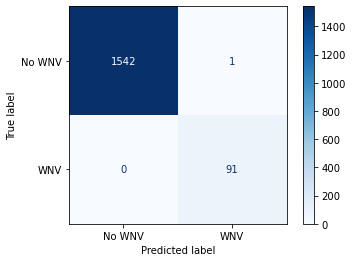

In [48]:
plot_confusion_matrix(gs_ss_pca_ada, 
                          X_test, y_test, 
                          cmap='Blues', 
                          values_format='d',
                          display_labels=['No WNV', 'WNV']
                         );

# SS, PCA, ADABoost(Random Trees)

In [49]:
train.shape

(8169, 28)

In [50]:
duration = time.time()
ss = StandardScaler()
pca = PCA()
ada = AdaBoostClassifier(base_estimator=RandomForestClassifier())

pipe_ss_pca_ada_rf = Pipeline([
    ('ss', ss),
    ('pca', pca),
    ('ada', ada)
])

pipe_ss_pca_ada_rf_params = {
    'pca__n_components': [20],                            # 23
    'pca__random_state': [42],
    'ada__n_estimators': [80],                            # 100, 120
    'ada__base_estimator__max_depth': [7],                # 3, 5
    'ada__base_estimator__max_features': [0.2],           # 0.05, 0.1
    'ada__random_state': [42],
    'ada__base_estimator__n_jobs': [-1],
    'ada__base_estimator__n_estimators': [200]            # 400, 600
}

gs_ss_pca_ada_rf = GridSearchCV(
    estimator=pipe_ss_pca_ada_rf,
    param_grid=pipe_ss_pca_ada_rf_params,
    cv=5,
)

gs_ss_pca_ada_rf.fit(X_train, y_train)
print(time.time() - duration)

3990.1357538700104


In [51]:
pipe_ss_pca_ada_rf.get_params()

{'memory': None,
 'steps': [('ss', StandardScaler()),
  ('pca', PCA()),
  ('ada', AdaBoostClassifier(base_estimator=RandomForestClassifier()))],
 'verbose': False,
 'ss': StandardScaler(),
 'pca': PCA(),
 'ada': AdaBoostClassifier(base_estimator=RandomForestClassifier()),
 'ss__copy': True,
 'ss__with_mean': True,
 'ss__with_std': True,
 'pca__copy': True,
 'pca__iterated_power': 'auto',
 'pca__n_components': None,
 'pca__random_state': None,
 'pca__svd_solver': 'auto',
 'pca__tol': 0.0,
 'pca__whiten': False,
 'ada__algorithm': 'SAMME.R',
 'ada__base_estimator__bootstrap': True,
 'ada__base_estimator__ccp_alpha': 0.0,
 'ada__base_estimator__class_weight': None,
 'ada__base_estimator__criterion': 'gini',
 'ada__base_estimator__max_depth': None,
 'ada__base_estimator__max_features': 'auto',
 'ada__base_estimator__max_leaf_nodes': None,
 'ada__base_estimator__max_samples': None,
 'ada__base_estimator__min_impurity_decrease': 0.0,
 'ada__base_estimator__min_impurity_split': None,
 'ada__b

In [52]:
gs_ss_pca_ada_rf.best_estimator_

Pipeline(steps=[('ss', StandardScaler()),
                ('pca', PCA(n_components=20, random_state=42)),
                ('ada',
                 AdaBoostClassifier(base_estimator=RandomForestClassifier(max_depth=7,
                                                                          max_features=0.2,
                                                                          n_estimators=200,
                                                                          n_jobs=-1),
                                    n_estimators=80, random_state=42))])

In [53]:
gs_ss_pca_ada_rf.score(X_train, y_train)

1.0

In [54]:
gs_ss_pca_ada_rf.score(X_test, y_test)

0.9993880048959608

In [55]:
y_preds = gs_ss_pca_ada_rf.predict(X_test)
tn, fp, fn, tp = confusion_matrix(y_test, y_preds).ravel()
print(f'Accuracy (Test Score): {round((tp+tn)/(tn+fp+fn+tp),3)*100}%')
print(f'Misclassification:                         {round(1-(tp+tn)/(tn+fp+fn+tp),3)*100}%')
print(f'Sensitivity / True Positive Rate / Recall: {round((tp)/(tp+fn),3)*100}%')
print(f'Specificity / True Negative Rate:          {round(tn/(tn+fp),3)*100}%')
print(f'Precision / Positive Predictive Value:     {round(tp/(tp+fp),3)*100}%')
print(f'Best Parameters:                           {gs_ss_pca_ada_rf.best_params_}')

Accuracy (Test Score): 99.9%
Misclassification:                         0.1%
Sensitivity / True Positive Rate / Recall: 98.9%
Specificity / True Negative Rate:          100.0%
Precision / Positive Predictive Value:     100.0%
Best Parameters:                           {'ada__base_estimator__max_depth': 7, 'ada__base_estimator__max_features': 0.2, 'ada__base_estimator__n_estimators': 200, 'ada__base_estimator__n_jobs': -1, 'ada__n_estimators': 80, 'ada__random_state': 42, 'pca__n_components': 20, 'pca__random_state': 42}


In [56]:
time.time() - duration

3990.713559627533

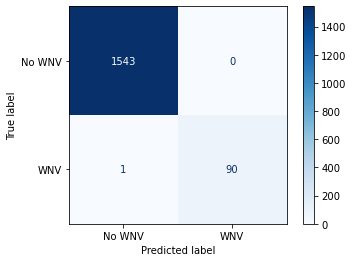

In [57]:
plot_confusion_matrix(gs_ss_pca_ada_rf, 
                      X_test, y_test, 
                      cmap='Blues', 
                      values_format='d',
                      display_labels=['No WNV', 'WNV']
                     );

# SS, PCA, SMOTE, ADABoost (Decision Trees)

In [109]:
ss = StandardScaler()
pca = PCA()
smote = SMOTE()
ada = AdaBoostClassifier(base_estimator=DecisionTreeClassifier())
duration = time.time()

pipe_ss_pca_smote_ada_dt = Pipeline([
    ('ss', ss),
    ('pca', pca),
    ('smote', smote),
    ('ada', ada)
])

pipe_ss_pca_smote_ada_dt_params = {
    'pca__n_components': [17, 20, 23],
    'pca__random_state': [42],
    'pca__svd_solver': ['full'],
    'smote__sampling_strategy': ['minority'],
    'smote__random_state':[42],
    'smote__n_jobs': [-1],
    'smote__k_neighbors': [5, 7], # 3
    'ada__base_estimator__max_depth': [25, 50], # 8, 10, 12
    'ada__base_estimator__max_features': [0.25, 0.5, 0.75],
    'ada__base_estimator__random_state': [42],
    'ada__n_estimators': [50, 100],
    'ada__random_state': [42]
}

gs_ss_pca_smote_ada_dt = GridSearchCV(
    estimator=pipe_ss_pca_smote_ada_dt,
    param_grid=pipe_ss_pca_smote_ada_dt_params,
    cv=5
)

gs_ss_pca_smote_ada_dt.fit(X_train, y_train)
print(time.time() - duration)

259.84563398361206


In [104]:
pipe_ss_pca_smote_ada_dt.get_params()

{'memory': None,
 'steps': [('ss', StandardScaler()),
  ('pca', PCA()),
  ('smote', SMOTE()),
  ('ada', AdaBoostClassifier(base_estimator=DecisionTreeClassifier()))],
 'verbose': False,
 'ss': StandardScaler(),
 'pca': PCA(),
 'smote': SMOTE(),
 'ada': AdaBoostClassifier(base_estimator=DecisionTreeClassifier()),
 'ss__copy': True,
 'ss__with_mean': True,
 'ss__with_std': True,
 'pca__copy': True,
 'pca__iterated_power': 'auto',
 'pca__n_components': None,
 'pca__random_state': None,
 'pca__svd_solver': 'auto',
 'pca__tol': 0.0,
 'pca__whiten': False,
 'smote__k_neighbors': 5,
 'smote__n_jobs': None,
 'smote__random_state': None,
 'smote__sampling_strategy': 'auto',
 'ada__algorithm': 'SAMME.R',
 'ada__base_estimator__ccp_alpha': 0.0,
 'ada__base_estimator__class_weight': None,
 'ada__base_estimator__criterion': 'gini',
 'ada__base_estimator__max_depth': None,
 'ada__base_estimator__max_features': None,
 'ada__base_estimator__max_leaf_nodes': None,
 'ada__base_estimator__min_impurity_de

In [110]:
gs_ss_pca_smote_ada_dt.best_params_

{'ada__base_estimator__max_depth': 8,
 'ada__base_estimator__max_features': 0.25,
 'ada__base_estimator__random_state': 42,
 'ada__n_estimators': 50,
 'ada__random_state': 42,
 'pca__n_components': 20,
 'pca__random_state': 42,
 'pca__svd_solver': 'full',
 'smote__k_neighbors': 5,
 'smote__n_jobs': -1,
 'smote__random_state': 42,
 'smote__sampling_strategy': 'minority'}

In [111]:
gs_ss_pca_smote_ada_dt.score(X_train, y_train)

1.0

In [112]:
tn, fp, fn, tp = confusion_matrix(y_test, y_preds).ravel()
print(f'Accuracy (Test Score): {round((tp+tn)/(tn+fp+fn+tp),3)*100}%')


Accuracy (Test Score): 99.9%


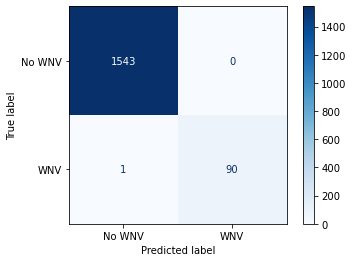

In [113]:
plot_confusion_matrix(gs_ss_pca_smote_ada_dt, 
                          X_test, y_test, 
                          cmap='Blues', 
                          values_format='d',
                          display_labels=['No WNV', 'WNV']
                         );

In [117]:
metrics.roc_auc_score(y_test, gs_ss_pca_smote_ada_dt.predict_proba(X_test)[:,1])

1.0

In [115]:
# y_train_pred_prob = grid.predict_proba(X_train)[:,1]
# y_valid_pred_prob = grid.predict_proba(X_valid)[:,1]
# train_auc = roc_auc_score(y_train, y_train_pred_prob)
# valid_auc = roc_auc_score(y_valid, y_valid_pred_prob)

In [ ]:
pd.DataFrame(pca.components_, columns=pf.get_feature_names(df.columns))